In [2]:
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D,Rescaling,RandomFlip,RandomRotation,Dense,Flatten,MaxPooling2D,InputLayer,Dropout,RandomZoom,RandomBrightness,RandomTranslation
from keras.losses import SparseCategoricalCrossentropy
from keras import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from pathlib import Path
import numpy as np
import copy
from random import randint

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
rescale = Rescaling(scale=1.0/255,name='rescale')
rotate = RandomRotation(factor=0.4,name="rotate")
flip = RandomFlip(mode="horizontal_and_vertical",name="flip")
zoom = RandomZoom(height_factor=(-0.2, -0.2), name="zoom")
translate = RandomTranslation(height_factor=0.2,width_factor=0.2,name='translate',fill_mode='nearest')


In [20]:
no_of_class = 102
IMG_SIZE = (300,300)

train = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/train/',image_size=IMG_SIZE)
test = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/valid/',image_size=IMG_SIZE)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


2024-09-15 23:10:01.196215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


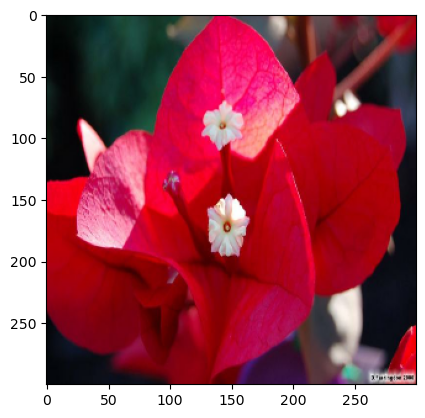

In [21]:
for i,j in train.take(2):
    plt.imshow(rescale(i[0]).numpy())

In [34]:
model_test = Sequential(name='CNN_Model')        

model_test.add(InputLayer(shape=(IMG_SIZE[0],IMG_SIZE[1],3),name='input'))
model_test.add(rescale)
model_test.add(zoom)
model_test.add(flip)
model_test.add(rotate)

model_test.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same',name='convo_1'))
model_test.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same',name='convo_2'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_1'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',name='convo_3'))
model_test.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',name='convo_4'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_2'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_5'))
model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_6'))
model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_7'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_3'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_8'))
model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_9'))
model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_10'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_4'))
#model_test.add(Dropout(0.2))

model_test.add(Flatten())
model_test.add(Dense(256, name='dense_1',activation='relu'))
model_test.add(Dense(128, name='dense_2',activation='relu'))
model_test.add(Dense(102, name='final',activation="softmax"))


In [35]:
model_test.compile(optimizer=Adam(learning_rate=0.0001),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [36]:
model_test.summary()

Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flip (RandomFlip)               │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotate (RandomRotation)         │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_1 (Conv2D)                │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_2 (Conv2D)                │ (None, 300, 300, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_3 (Conv2D)                │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_4 (Conv2D)                │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_5 (Conv2D)                │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_6 (Conv2D)                │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_7 (Conv2D)                │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_8 (Conv2D)                │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_9 (Conv2D)                │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_10 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final (Dense)                   │ (None, 102)            │        13,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,540,486 (44.02 MB)

 Trainable params: 11,540,486 (44.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#tf.keras.utils.plot_model(model_test,rankdir="LR")

In [9]:
"""new_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=no_of_class,
    classifier_activation="softmax",
)

new_model.summary()"""


'new_model = tf.keras.applications.VGG16(\n    include_top=False,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=(224,224,3),\n    pooling=None,\n    classes=no_of_class,\n    classifier_activation="softmax",\n)\n\nnew_model.summary()'

In [37]:
model_test.load_weights('../saved_weights/cnn.keras')

In [ ]:
history=model_test.fit(train,epochs=10,validation_data=test,validation_batch_size=8,batch_size=8)

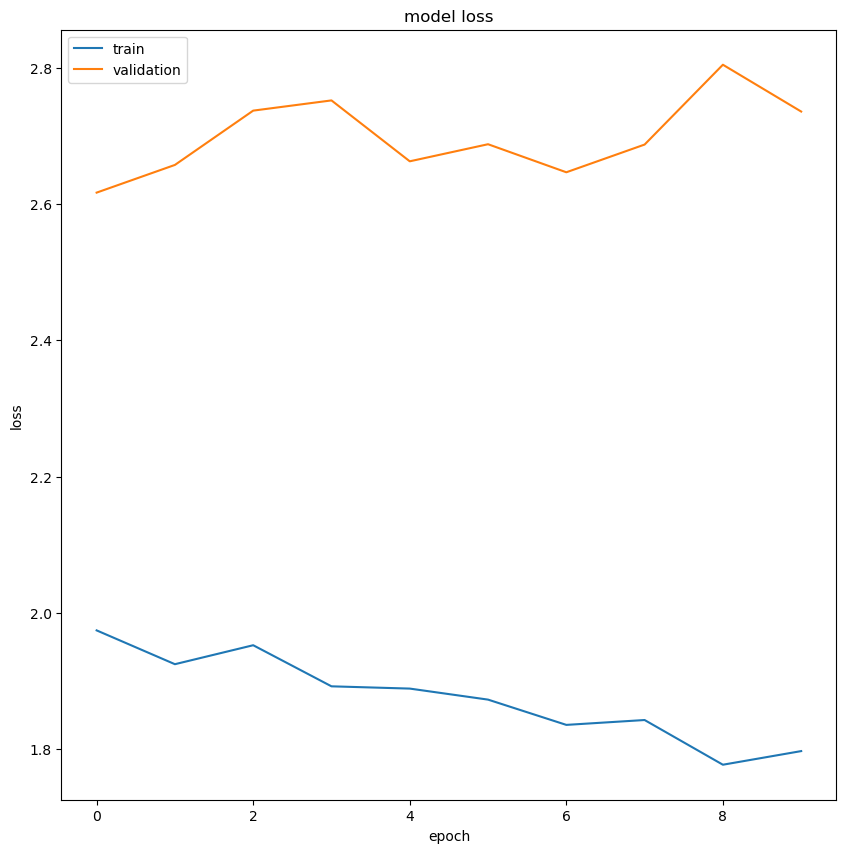

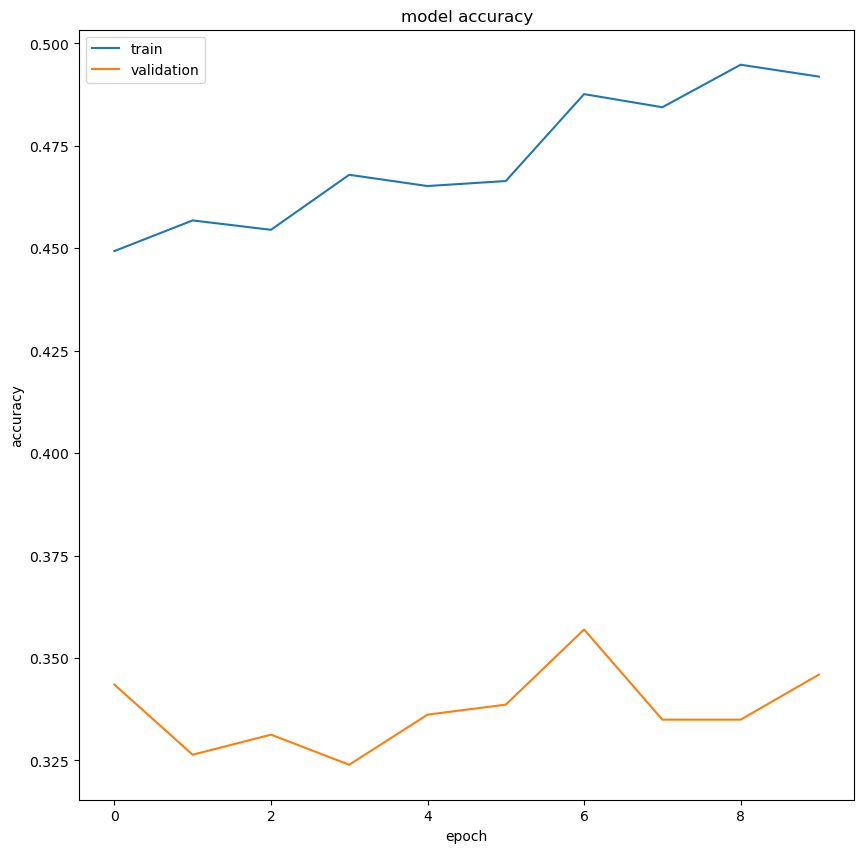

In [38]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
model_test.save('../saved_weights/cnn.keras')

In [39]:
model_test.evaluate(test)

2024-09-15 23:17:21.412808: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.77GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-15 23:17:21.436873: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 367.60MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-15 23:17:21.436970: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 367.60MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-15 23:17:21.436988: W external/local_tsl/tsl/framework/

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.6456 - loss: 2.1757


[2.0448267459869385, 0.6418092846870422]